In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))

In [2]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fglob = file.path(fdiry, "*GATA1*")
Sys.glob(fglob) %>% basename

[1] "region_GATA1_perbase.bed"                                        
[2] "Tile_K562_hg38_20210130.GATA1.stranded_pos.Input.perbase.tsv.gz" 
[3] "Tile_K562_hg38_20210130.GATA1.stranded_pos.Output.perbase.tsv.gz"

In [3]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20210130.GATA1.stranded_pos.Input.perbase.tsv.gz"
fpath = file.path(fdiry, fname)

txt = paste("zcat", fpath, "|", "wc -l")
system(txt, intern=TRUE)

[1] "2000351"

## Import data

In [4]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20210130.GATA1.stranded_pos.Input.perbase.tsv.gz"
fpath = file.path(fdiry, fname)

### set colnumn
#ctypes = c(col_character(), col_integer(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End", "Count")

### import data
dat = read_tsv(
    fpath,
    col_names = cnames,
    show_col_types = FALSE)

dat = dat %>% dplyr::mutate(Sample = "Input_rep1")

### assign
dat_tmpra_gata1_inp = dat
print(dim(dat))
head(dat)

[1] 2000351       5


Chrom,Start,End,Count,Sample
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47786400,47786401,.,Input_rep1
chrX,47786401,47786402,2117.787,Input_rep1
chrX,47786402,47786403,2117.787,Input_rep1
chrX,47786403,47786404,2117.787,Input_rep1
chrX,47786404,47786405,2117.787,Input_rep1
chrX,47786405,47786406,2117.787,Input_rep1


In [6]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20210130.GATA1.stranded_pos.Output.perbase.tsv.gz"
fpath = file.path(fdiry, fname)

### set colnumn
#ctypes = c(col_character(), col_integer(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End", "Count")

### import data
dat = read_tsv(
    fpath,
    col_names = cnames,
    show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Sample = "Output_rep1")

### assign
dat_tmpra_gata1_out = dat
print(dim(dat))
head(dat)

[1] 2000351       5


Chrom,Start,End,Count,Sample
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47786400,47786401,.,Output_rep1
chrX,47786401,47786402,10474.869,Output_rep1
chrX,47786402,47786403,10474.869,Output_rep1
chrX,47786403,47786404,10474.869,Output_rep1
chrX,47786404,47786405,10474.869,Output_rep1
chrX,47786405,47786406,10474.869,Output_rep1


In [7]:
### where to visualize
LOC_START  = 48780000
LOC_END    = 48826000

dat = bind_rows(dat_tmpra_gata1_inp, dat_tmpra_gata1_out)
dat = dat %>% 
    dplyr::filter(Count != ".") %>%
    dplyr::filter(Start >= LOC_START, End <= LOC_END) %>%
    dplyr::mutate(across(c(Start, End, Count), as.integer)) %>%
    dplyr::mutate(Loc = End)
    
head(dat)

Chrom,Start,End,Count,Sample,Loc
<chr>,<int>,<int>,<int>,<chr>,<int>
chrX,48780000,48780001,554,Input_rep1,48780001
chrX,48780001,48780002,609,Input_rep1,48780002
chrX,48780002,48780003,609,Input_rep1,48780003
chrX,48780003,48780004,609,Input_rep1,48780004
chrX,48780004,48780005,609,Input_rep1,48780005
chrX,48780005,48780006,609,Input_rep1,48780006


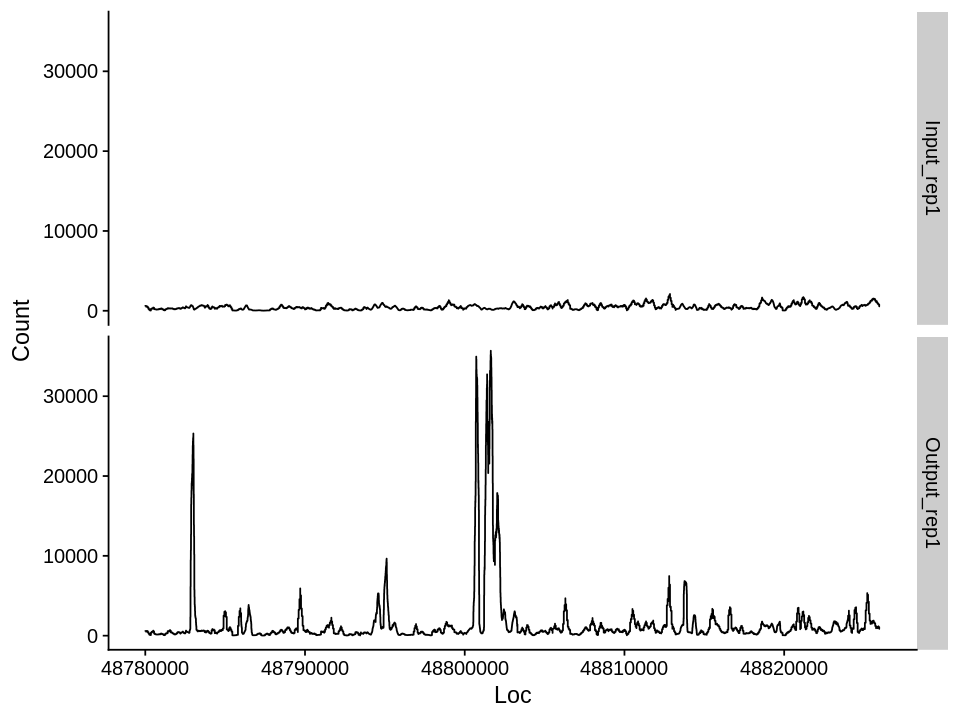

In [8]:
gpt = ggplot(dat, aes(x=Loc, Count)) + geom_line() + theme_cowplot() + facet_grid(Sample~.)
options(repr.plot.height=6, repr.plot.width=8)
print(gpt)